## Chi-square

Compute chi-squared test between categorical features and classification target.

* The Chi-Squared $(χ²)$ test is a statistical test commonly used in machine learning for feature selection, especially when dealing with categorical data. It helps determine whether there is a significant association between two categorical variables—typically, a feature and the target variable.

* Key points about the chi-squared test in feature selection:

    * Categorical data: The chi-squared test is most effective when applied to categorical features, comparing the observed frequencies of a feature against the expected frequencies based on the target variable. 

    * Statistical significance: By calculating a chi-squared statistic, the test determines whether the observed relationship between the feature and the target variable is statistically significant, meaning it's unlikely to be due to chance. 

    * Filter method: The chi-squared test is considered a "filter" method for feature selection, meaning it evaluates each feature independently before feeding them into the machine learning model. 

    * Working:

        * Hypothesis Setup:

            * Null Hypothesis (H₀): The feature and the target variable are independent (i.e., the feature has no predictive power).
            * Alternative Hypothesis (H₁): The feature and the target variable are dependent (i.e., the feature provides useful information).

        * Compute the Chi-Squared Statistic: The formula for the Chi-Squared statistic is:

$$X^2 = \sum_{}^{}\frac{(observed — expected)^2}{expected}$$



* where:
    * observed = Observed frequency (actual count in the dataset)
    * expected = Expected frequency (assuming independence)

* Compare with Chi-Squared Distribution:

    * The computed $X^2$ value is compared with a critical value from the chi-squared distribution table (based on degrees of freedom).
    * If the computed value is large, it indicates that the feature and target variable are likely dependent.

* Feature Selection:

    * Features with higher Chi-Squared values are considered more important.
    * Low-scoring features (which do not significantly impact the target variable) can be removed.

* Important considerations:

    * Large sample size: The chi-squared test is more reliable with a large sample size. 
    * Interpretation: A high chi-squared value doesn't necessarily mean a "good" feature - consider the context of your problem and the magnitude of the effect. 
    * Other feature selection methods: While useful for categorical data, the chi-squared test should be combined with other feature selection techniques like correlation analysis for continuous features.
    * Works well with categorical features (e.g., gender, product category, customer segments).
    * Used in classification tasks where the target variable is also categorical.
    * Not suitable for continuous numerical features (these should be discretized first).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [2]:
variables = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']

data = pd.read_csv("titanic.csv", usecols=variables)

data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("survived", axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((914, 5), (392, 5))

In [4]:
# contingency table for gender

c = pd.crosstab(y_train, X_train['sex'])

c

sex,female,male
survived,,
0,90,477
1,228,119


In [5]:
chi2_contingency(c)

Chi2ContingencyResult(statistic=233.4328744513778, pvalue=1.0634411614151734e-52, dof=1, expected_freq=array([[197.27133479, 369.72866521],
       [120.72866521, 226.27133479]]))

In [6]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

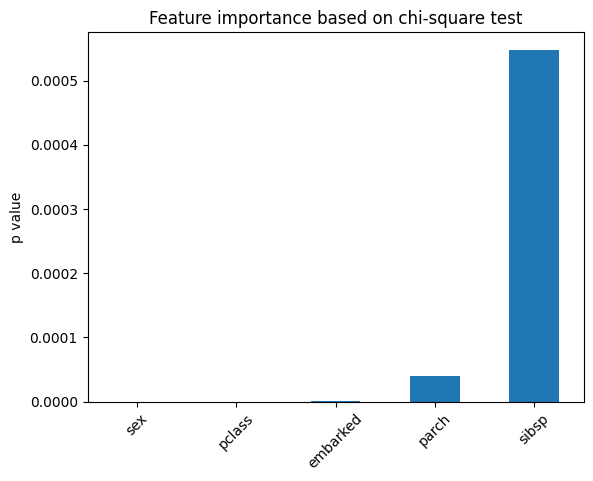

In [7]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [8]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

Index(['sex', 'pclass', 'embarked'], dtype='object')

In [10]:
# sklearn returns numpy arrays. Convert to dataframe

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,sex,pclass,embarked
840,male,3,S
866,male,3,S
427,male,2,S
478,male,2,C
1305,male,3,S


In [3]:
df2 = pd.read_csv('D:\MSIS\MLPA\datasets\dataset_1.csv')
df2.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [4]:
X = df2.drop('target', axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [8]:
c = pd.crosstab(y_train, X['var_1'])
c

var_1,0,3,6,9
target,,,,
0,33611,7,5,1
1,1376,0,0,0


In [9]:
chi2_contingency(c)

Chi2ContingencyResult(statistic=0.5321986254763428, pvalue=0.9117626614492961, dof=3, expected_freq=array([[3.36115111e+04, 6.72480000e+00, 4.80342857e+00, 9.60685714e-01],
       [1.37548891e+03, 2.75200000e-01, 1.96571429e-01, 3.93142857e-02]]))

In [10]:
chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

In [16]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).head(10)


var_152    2.798808e-184
var_132    8.457569e-180
var_262    3.694722e-179
var_230    6.749192e-179
var_4      2.284080e-147
var_15     3.349721e-143
var_49      9.122496e-90
var_110     6.949663e-61
var_18      2.750227e-25
var_101     1.533877e-24
dtype: float64